In [1]:
# using Statistics
# using SpecialFunctions
using LinearAlgebra
# using Polynomials
using Plots
# using IntervalArithmetic
# using BenchmarkTools
# using IntervalMatrices

# Jacobi級数

Jacobi級数とは、直交多項式系であるJacobi多項式を基底とした級数展開であり、次のように書ける。

$$
 f(x) = \sum_{n=0}^\infty a_n P^{k,m}_n(x),\quad x\in[-1,1].
$$

ここで、Jacobi多項式 $P^{(k,m)}_n(x)$ は区間 $[-1,1]$ で、重み関数 $\omega(x):=(1-x)^k(1+x)^m$ に対して直交する直交多項式である。すなわち

$$
    \int_{-1}^1 P^{k,m}_n(x)P^{k,m}_l(x)\omega(x)dx = W_n^{k,m}\delta_{nl},\quad\delta_{nl}=\begin{cases}1, & n=l\\ 0,&n\ne l \end{cases}
$$

をみたす。ただし、$W_n^{(k,m)}$はスケーリング定数で次のような値である。

$$
    W_n^{k,m} = \frac{2^{k+m+1}}{2 n+k+m+1} \frac{\Gamma(n+k+1) \Gamma(n+m+1)}{n ! \Gamma(n+k+m+1)}.
$$


一般的な直交多項式の関数値は以下のような3項間漸化式で求められる。

$$
\begin{align}
    p_{n+1}=(a_n x - b_n) p_n - c_n p_{n-1},\quad n\ge 0\\
    p_{-1} = 0,\quad p_0 = k_0.
\end{align}
$$

Jacobi多項式の場合には以下の漸化式より求められる。
$$
\begin{align}
	&P_{n+1}^{k,m} (x) = (\alpha_n x -\beta_n ) P_n^{k,m}(x) - \gamma_n P_{n-1}^{k,m} (x),\quad n\ge 0,\\
    &P^{k,m}_{-1}(x) = 0,\quad P^{k,m}_0(x) = 1,%\quad P^{k,m}_1(x) = \frac12(k+m+2)x + \frac12(k-m),
	\end{align}
$$

ただし、

$$
\begin{align}
            % \gamma_n &= 2(n+1)(n+k+m+1)(2n+k+m)\\
		\alpha_n &= \frac{(2n+k+m+1)(2 n +k+m+2)}{2(n+1)(n+k+m+1)}\\[1mm]
		\beta_n &= \frac{(m^2 -k^2)(2n+k +m+1)}{2(n+1)(n+k+m+1)(2n+k+m)}\\[1mm]
		\gamma_n &= \frac{(n+k)(n+m)(2n+k+m+2)}{(n+1)(n+k+m+1)(2n+k+m)}
	\end{align}
$$

である。

またスケールを合わせることで $k=m=0$ のときがLegendre多項式、$k=m=-1/2$ のときChebyshev多項式を表すことになる。

この漸化式を用いたJacobi多項式の関数値は以下のようなコードで得られる。

In [2]:
function jacobiP(n,k,m,x) #引数alp=k,bet=m
    apb=k+m
    if n==0
        return ones(size(x)) .+ 0
    elseif n==1
        return 0.5*((apb+2)*x.+k.-m)
    else
        polylst=ones(size(x))
        poly=0.5*((apb+2)*x.+k.-m)
        polyn=zeros(size(x))
        for i=1:n-1
            a=(2*i+apb+1)*(2*i+apb+2)/(2*(i+1)*(i+apb+1))
	        b=(m^2-k^2)*(2*i+apb+1)/(2*(i+1)*(i+apb+1)*(2*i+apb))
	        c=(i+k)*(i+m)*(2*i+apb+2)/((i+1)*(i+apb+1)*(2*i+apb))
            polyn=(a*x.-b).*poly.-c*polylst
            polylst=poly
            poly=polyn
        end
        return polyn
    end
end

jacobiP (generic function with 1 method)

例として添え字を $k=1$, $m=1$ としたとき、$0\sim 5$次のヤコビ多項式の関数値は以下のようになる。

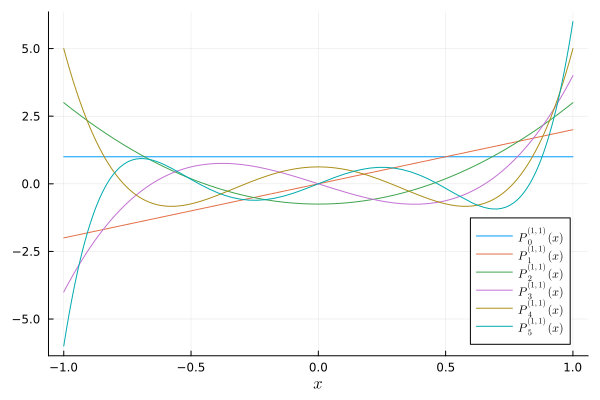

In [3]:
k = 1; m = 1
plt = plot()
for n = 0:5
    Pn(x) = jacobiP(n, k, m, x)
    plot!(plt, Pn, -1, 1, label="\$P^{($k,$m)}_{$n}(x)\$")
end
plot!(plt,xlabel="\$x\$")

Jacobi多項式で第一種チェビシェフ多項式 $T_n(x)$ ($k=m=-\frac{1}{2}$) を計算してみる。スケーリングに注意すると次のように与えることができる。

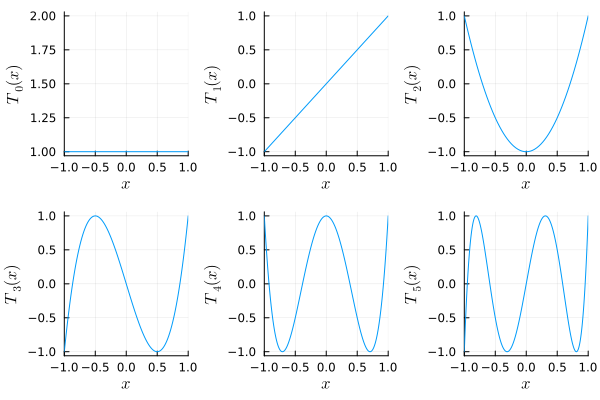

In [4]:
k = -0.5; m = -0.5
n=0
T0(x) =2^(2*n) / binomial(2n,n) * jacobiP(0, k, m, x)
plt0=plot(T0, -1, 1, ylabel = "\$T_0(x)\$")

n=1
T1(x) =2^(2*n) / binomial(2n,n) * jacobiP(1, k, m, x)
plt1=plot(T1, -1, 1, ylabel = "\$T_1(x)\$")

n=2
T2(x) =2^(2*n) / binomial(2n,n) * jacobiP(2, k, m, x)
plt2=plot(T2, -1, 1, ylabel = "\$T_2(x)\$")

n=3
T3(x) =2^(2*n) / binomial(2n,n) * jacobiP(3, k, m, x)
plt3=plot(T3, -1, 1, ylabel = "\$T_3(x)\$")

n=4
T4(x) =2^(2*n) / binomial(2n,n) * jacobiP(4, k, m, x)
plt4=plot(T4, -1, 1, ylabel = "\$T_4(x)\$")

n=5
T5(x) =2^(2*n) / binomial(2n,n) * jacobiP(5, k, m, x)
plt5=plot(T5, -1, 1, ylabel = "\$T_5(x)\$")

plot(plt0,plt1,plt2,plt3,plt4,plt5,
xlabel = "\$x\$",
xlims = (-1, 1),
#ylims = (-1, 6),
legend=false)

Jacobi多項式の各次数での係数と定義域内での値における関数値が分かれば、Jacobi級数の関数値を計算することができる。
そのために、三項間漸化式でJacobi多項式の関数値を求め、係数とかけ足し合わせる手法(**Forsythe algorithm**という)では以下のように計算を行う。

Jacobi多項式の三項間漸化式

$$
P_n^{k,m}(x) - a_n(x)P_{n-1}^{k,m}(x) + b_nP_{n-2}^{k,m}(x) =0,\; P_0^{k,m}=1,\; P_1^{k,m}=\frac{1}{2}\{(k+m+2)x+(k-m)\},
$$
$$
\begin{align}
a_n(x)&=\frac{(2n+k+m-1) \{(2n+k+m-2)(2n+k+m)x +k^2-m^2\}}{2n(n+k+m)(2n+k+m-2)}\\
b_n &=-\frac{(n+k-1)(n+m-1)(2n+k+m)}{n(n+k+m)(2n+k+m-2)}.
\end{align}
$$
について、Jacobi多項式の各次数での係数を$c_n$
とすると補間$f_n$は次の各ステップで求められる。
$$
\begin{align*}
& t_0=\mathrm{P}_0(x)=1, \quad f_0=c_0, \\
& t_1=\mathrm{P}_1(x)=a_1(x), \quad f_1=f_0+c_1 t_1, \\
& \text { for } k=2 \text { to } n \\
& \quad t_i=a_i(x) t_{i-1}+b_i t_{i-2}, \\
& \quad f_i=f_{i-1}+c_i t_i, \\
& \text { end } \\
& p_n(x)=f_n
\end{align*}
$$

Forsytheアルゴリズムを使ってJacobi多項式の関数値を計算するコードは以下

In [5]:
function falg(n,k,m,c_n,x)
    rec_a(j)=((2*j+k+m-1)*(2*j+k+m-2)*(2*j+k+m)*x .+ k^2 .-m^2) ./ (2*j*(j+k+m)*(2*j+k+m-2))
    rec_b(j)=-(j+k-1)*(j+m-1)*(2*j+k+m)/(j*(j+k+m)*(2*j+k+m-2))
    t_n=zeros(n+1,length(x)); f_n=zeros(n+1,length(x))
    t_n[1,:] .= 1; f_n[1,:] .= c_n[1]
    t_n[2,:] .= -((k+m+2) .* x .+ (k-m)) ./ 2#rec_a(1)
    f_n[2,:] = f_n[1,:] .+c_n[2] .*t_n[2,:]
    for i=2:n
        t_n[i+1,:]=rec_a(i) .*t_n[i,:] .+ rec_b(i) .*t_n[i-1,:]
        f_n[i+1,:]=f_n[i,:] .+c_n[i+1] .*t_n[i+1,:]
    end
    if length(x) == 1
        return f_n[n+1,1]
    else
        return f_n[n+1,:]
    end
end

falg (generic function with 1 method)

Forsytheアルゴリズムよりも計算量について優れた方法としてClenshawのアルゴリズムがある。Clenshawのアルゴリズムでは係数を掛け足しあわせた総和 $p_n(x)=\sum_0^n c_i P_n^{k,m}(x)$は
\begin{align*}
&q_{n+1}=q_{n+2}=0\\
&\text{for}\ k=n\ \text{to}\ 0\ \text{by}\ -1\\
&\quad q_k=c_k+a_{k+1}(x) q_{k+1}+b_{k+2} q_{k+2}\\
&\text{end}\\
&p_n(x)=q_0
\end{align*}
から求められる。

In [6]:
function csalg(n,k,m,c_n,x)
    q=zeros(n+3,length(x))
    function rec_a(j)
        if j==1
            return -((k+m+2) .* x .+ (k-m)) ./ 2
        else
            return ((2*j+k+m-1)*(2*j+k+m-2)*(2*j+k+m)*x .+ k^2 .- m^2) ./ (2*j*(j+k+m)*(2*j+k+m-2))
        end
    end
    rec_b(j)=-(j+k-1)*(j+m-1)*(2*j+k+m)/(j*(j+k+m)*(2*j+k+m-2))
    for i=n:-1:0
        q[i+1,:] = c_n[i+1] .+ rec_a(i+1).*q[i+2,:] .+ rec_b(i+2).*q[i+3,:]
    end
    if length(x)==1
        return q[1,1]
    else
        return q[1,:]
    end
end

csalg (generic function with 1 method)

Jacobi多項式による補間をおこなうためには多くの次数でのヤコビ多項式の関数値を求める必要がある。そこでより効率的に関数値を求め補間を実行する方法を紹介する。

Forsytheアルゴリズムの計算は直行多項式の関数値$P_n^{k,m}$の評価と係数を掛けた和の評価の2つのステップに分けられる。
これらを行列形式で表記すると,

$$
F\boldsymbol{p}=\boldsymbol{e_{n+1}} \\
$$

$$
F=\left(\begin{array}{ccccc}
1 & -a_n(x) & -b_n & & \\
& \ddots & \ddots & \ddots & \\
& & \ddots & \ddots & -b_2 \\
& & & \ddots & -a_1(x) \\
& & & & 1
\end{array}\right), \quad \boldsymbol{p}=\left(\begin{array}{c}
\mathrm{P}_n(x) \\
\vdots \\
\vdots \\
\mathrm{P}_1(x) \\
\mathrm{P}_0(x)
\end{array}\right),
\quad \boldsymbol{e}_{n+1}=\left(\begin{array}{c}
0 \\
\vdots \\
\vdots \\
0 \\
1
\end{array}\right),
$$

という連立一次方程式を $\boldsymbol{p}$ について解き、係数ベクトル $\boldsymbol{c}$ との内積を計算する。すなわち

$$
p_n(x)=\sum_0^n c_i P_n(x)=\boldsymbol{c}^T \boldsymbol{p}
$$

となる。

In [7]:
function fmat(n,k,m,x)
    rec_a(j)=(2*j+k+m-1)*((2*j+k+m-2)*(2*j+k+m) .* x .+ k^2 .- m^2) ./ (2*j*(j+k+m)*(2*j+k+m-2))
    rec_b(j)=-(j+k-1)*(j+m-1)*(2*j+k+m)/(j*(j+k+m)*(2*j+k+m-2))
    E = Matrix{Float64}(I,n+1,n+1)
    F = repeat(E, outer=(1, 1, length(x)))
    F[n,n+1,:] .= -((k+m+2) .* x .+ (k-m)) ./ 2 #-rec_a(1)
    for i=2:n
        F[n+1-i,n+2-i,:] .= -rec_a(i)
        F[n+1-i,n+3-i,:] .= -rec_b(i)
    end
    return F
end

fmat (generic function with 1 method)

In [8]:
n=5;k=1;m=1
point=range(-1,1,length=100)
e=zeros(n+1); e[end]=1
F=fmat(n,k,m,point) #各xの行列Fを求め纏めた3次元配列
# println(jacobiP(n,k,m,point))
p = dropdims(mapslices(x ->  x \ e, F, dims=[1,2]),dims=2) #Fとeの右除算からxごと(列方向)の0～n次でのヤコビの関数値(行方向)

6×100 Matrix{Float64}:
 -6.0  -4.85951  -3.85509  -2.97636  …  2.97636  3.85509  4.85951  6.0
  5.0   4.32107   3.6967    3.12439     3.12439  3.6967   4.32107  5.0
 -4.0  -3.64488  -3.30655  -2.98467     2.98467  3.30655  3.64488  4.0
  3.0   2.85002   2.70309   2.55923     2.55923  2.70309  2.85002  3.0
 -2.0  -1.9596   -1.91919  -1.87879     1.87879  1.91919  1.9596   2.0
  1.0   1.0       1.0       1.0      …  1.0      1.0      1.0      1.0

実際に関数値をプロットしてみると、各Jacobi多項式の概形がプロットされる。

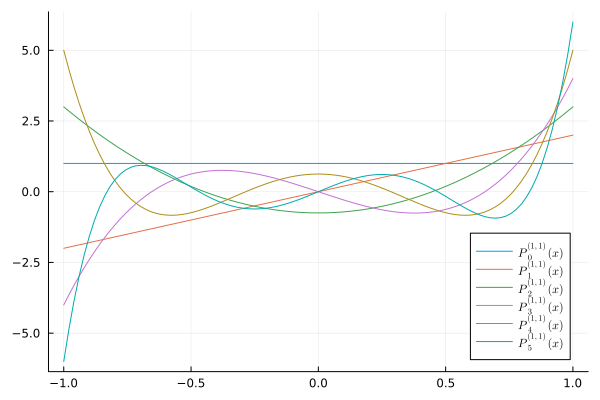

In [9]:
plot(Vector(point),p[6,:], label="\$P^{($k,$m)}_{0}(x)\$")
plot!(Vector(point),p[5,:], label="\$P^{($k,$m)}_{1}(x)\$")
plot!(Vector(point),p[4,:], label="\$P^{($k,$m)}_{2}(x)\$")
plot!(Vector(point),p[3,:], label="\$P^{($k,$m)}_{3}(x)\$")
plot!(Vector(point),p[2,:], label="\$P^{($k,$m)}_{4}(x)\$")
plot!(Vector(point),p[1,:], label="\$P^{($k,$m)}_{5}(x)\$")

本資料は以下のような文献・Web ページ等を参考に書いています。

### 参考文献
1. Jie Shen, Tao Tang, Li-Lian Wang, Spectral Methods -Algorithms, Analysis and Applications-, Springer Berlin, Heidelberg, 2011.
(直交多項式を用いたスペクトル法の理論からコードの実装まで丁寧に解説されている教科書)

阪田智也